In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os.path 
from os import listdir
import os, sys

In [3]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
from IPython.html import widgets
from PIL import Image

/Users/kellygarcia/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
import numpy as np
import math as m
import csv
#import plotly.plotly as py
#import plotly.graph_objs as go

In [42]:
#THIS OPENS ALL THE FILES. Change the path for your use.

f = open("/Users/kellygarcia/Google Drive/Test/Port2 1.6kW 25sccm 2.4mT Forward.txt", "r")
reader = csv.reader(f, delimiter='\n')
result = np.array(list(reader))

wavelength = []
intensity = []

for i in range(0, len(result)):
    p = result[i]
    dat = p[0].split()
    w = float(dat[0])
    i = float(dat[1])
    wavelength.append(w)
    intensity.append(i)   

print len(wavelength) #this confirms how many total data points a file has from a B scan

f.close()

153216


In [41]:
#RUN AFTER FORWARD IS DONE

f = open("/Users/kellygarcia/Google Drive/Test/Port2 1.6kW 25sccm 2.4mT Reverse.txt", "r")
reader = csv.reader(f, delimiter='\n')
result = np.array(list(reader))

wavelength_r = []
intensity_r = []

for i in range(0, len(result)):
    p = result[i]
    dat = p[0].split()
    w = float(dat[0])
    i = float(dat[1])
    wavelength_r.append(w)
    intensity_r.append(i)   

print len(wavelength_r) #this number should be the same as the previous


f.close()

149568


In [33]:
#This breaks all the wavelength values into increments of 3648 points.
#This means we are making a nested list where it is a list of lists-
#each list contains 3648 values

#We are taking the length to see how many lists there are with 
#3648 values
len([wavelength[i:i+3648] for i in range(0, len(wavelength), 3648)])

41

153216

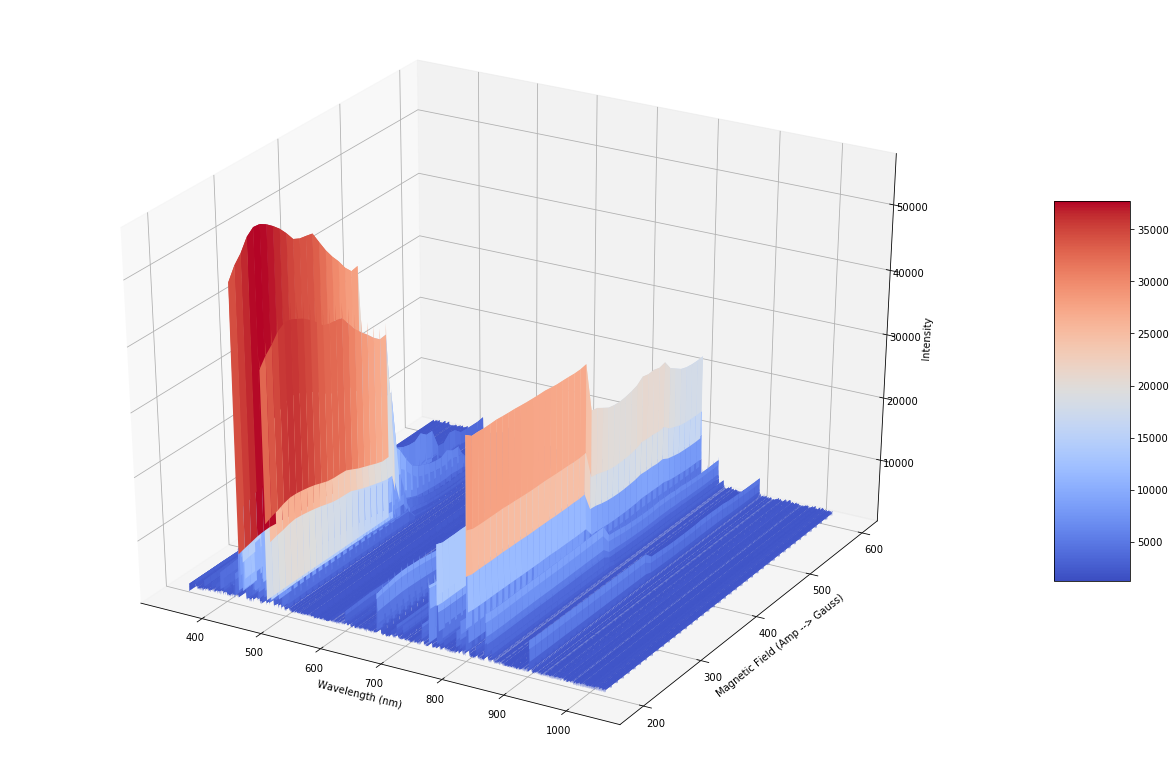

In [15]:
#let's make a 3D plot!

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from matplotlib import animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(22, 14))
ax = fig.gca(projection= '3d')

#let's change these lists to arrays so for our plot function to read 
new_wavelength = [wavelength[i:i+3648] for i in range(0, len(wavelength), 3648)]
new_intensity = [intensity[i:i+3648] for i in range(0, len(intensity), 3648)]

X = np.array(new_wavelength)
Z = np.array(new_intensity)
#remember to change the current values!!
I_i = 190
I_f = 600
Y = np.array([[i]*3648 for i in range(I_i,I_f+10,10)]) #this array is a nested list of current values counting by 10 with each value repeating 3648 times


#this is the plotting function!
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=1, cstride=4)

#this is the color bar in the graph
fig.colorbar(surf, shrink=.5, aspect=5)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Magnetic Field (Amp --> Gauss)') #we will change to Gauss later
ax.set_zlabel('Intensity')

show = plt.show()


In [18]:
#now let's upgrade

import plotly.plotly as py
from plotly.graph_objs import Surface
import plotly.graph_objs as go
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from matplotlib import animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import itertools

#REMEMBER TO CHANGE THE CURRENT!!
I_i = 190
I_f = 600

lst = range(I_i,I_f+10,10)

#This is the plot function! The list function get for y repeats each value 3648 WITHOUT BEING A NESTED LIST!
trace1 = go.Mesh3d(x=(wavelength),
                   y=(list(itertools.chain.from_iterable(itertools.repeat(x, 3648) for x in lst))),
                   z=(intensity_r),
                   opacity=0.5,
                   #color='rgba(244,22,100,0.6)' #we can change colors here
                  )

#This assigns the layout and structure for our plot.
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title = 'Wavelength (nm)'),
                    yaxis = dict(
                        title = 'Magnetic Field (Amps)'),
                    zaxis = dict(
                        title = 'Intensity'),),
                    width=700,
                    margin=dict(
                    r=20, l=10,
                    b=10, t=10)
                  )
#voila! The figure
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

In [ ]:
#let's plot our hysteresis!
#We want the intensities a specific wavelength, so let's begin.

In [43]:
#Set a wavelength to your choosing from 'wavelength'
pick_wl = 762.97

#Since these values are repeated once for every 3648 values, we will find the position holding pick_wl 
indices = [i for i, x in enumerate(wavelength) if x==pick_wl]
print indices #these are the positions with our wavelength

[2083, 5731, 9379, 13027, 16675, 20323, 23971, 27619, 31267, 34915, 38563, 42211, 45859, 49507, 53155, 56803, 60451, 64099, 67747, 71395, 75043, 78691, 82339, 85987, 89635, 93283, 96931, 100579, 104227, 107875, 111523, 115171, 118819, 122467, 126115, 129763, 133411, 137059, 140707, 144355, 148003, 151651]


In [44]:
#This does the same as above.
indices_r = [i for i, x in enumerate(wavelength_r) if x==pick_wl]
print indices_r

[2083, 5731, 9379, 13027, 16675, 20323, 23971, 27619, 31267, 34915, 38563, 42211, 45859, 49507, 53155, 56803, 60451, 64099, 67747, 71395, 75043, 78691, 82339, 85987, 89635, 93283, 96931, 100579, 104227, 107875, 111523, 115171, 118819, 122467, 126115, 129763, 133411, 137059, 140707, 144355, 148003]


In [45]:
#Now we will pull out the intensities within 'indices' and make a list
pick_intensity = []
for i in indices:
    p = intensity[i]
    pick_intensity.append(p)
print pick_intensity

[17430.3647, 17123.4352, 17111.9663, 17126.1593, 17123.5791, 17133.7567, 17144.1604, 17098.2861, 17088.4558, 17069.0817, 17025.9315, 17016.6956, 16986.8566, 16981.8798, 16944.9959, 16882.9425, 16915.4234, 16902.3981, 16894.5956, 16909.5871, 16979.2374, 12909.617, 12726.5287, 12396.1297, 12025.9386, 11879.5294, 11775.0216, 11744.1586, 11781.8005, 11890.363, 12189.756, 12058.2764, 12065.2184, 11774.8987, 11885.3459, 11447.8588, 11277.7135, 11069.7834, 10992.0829, 10947.9079, 10950.4887, 11006.5622]


In [46]:
#This does the same as above.
pick_intensity_r = []
for i in indices_r:
    p = intensity_r[i]
    pick_intensity_r.append(p)
print pick_intensity_r

[11179.2677, 11193.3374, 11202.0611, 11123.8493, 11065.7688, 11117.8696, 11314.4336, 11807.4203, 11904.801, 12407.1277, 12409.2982, 12354.454, 12171.939, 12041.9948, 11968.2267, 11932.0188, 11939.2075, 12228.6267, 12686.6952, 12919.5489, 12950.1257, 17026.3818, 17037.2367, 17056.815, 17100.5804, 17149.8537, 17288.3374, 17361.3686, 17298.7823, 17378.5506, 17489.2436, 17603.0287, 17721.9544, 17800.9039, 17910.9204, 17920.8123, 17890.3383, 17879.0745, 17907.5821, 18061.1799, 18107.8118]


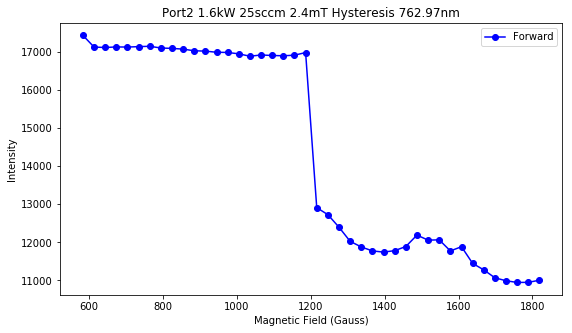

In [31]:
figsize(9,5)
y = pick_intensity

#Change your current here!!!
Ii = 190
If = 600
Bi = Ii*3.015 +10
Bf = If*3.015 +10
ranger = np.linspace(Bi,Bf,42) #This conversion breaks the range of Bi and Bf into 42 pieces (set accordingly to however many lists of 3648 files there are)
x = np.array(ranger).tolist() #This converts our array into a list

y1 = pick_intensity_r[::-1] #we need to reverse the order of 'pick_intensity_r' to graph accordingly


plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Intensity')

plt.plot(x,y1,'-o',color='r', label='Reverse')
plt.plot(x,y,'-o',color='b', label='Forward')
t = os.path.basename(f.name[0:62]) + 'Hysteresis ' + str(pick_wl) + 'nm'
plt.title(t) #The title name 't' is a string formed by concating the filename and wavlength chosen.
plt.legend()
plt.savefig('/Users/kellygarcia/Google Drive/Test/' + str(t[0:44]) + '.png') #choose a path to save the .png to your choosing!




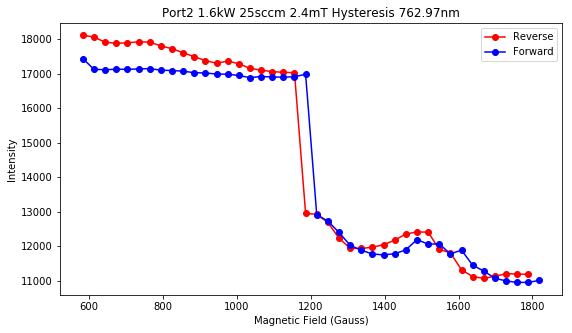

In [53]:
##Ignore the rest :) 


figsize(9,5)
y = pick_intensity

Ii = 190
If = 600
Bi = Ii*3.015 + 10
Bf = If*3.015 + 10
ranger = np.linspace(Bi,Bf,42)
x = np.array(ranger).tolist()

Ii1 = 190
If1 = 590
Bi1 = Ii1*3.015 + 10
Bf1 = If1*3.015 + 10
ranger = np.linspace(Bi1,Bf1,41)
x1 = np.array(ranger).tolist()

y1 = pick_intensity_r[::-1]


plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Intensity')

plt.plot(x1,y1,'-o',color='r', label='Reverse')
plt.plot(x,y,'-o',color='b', label='Forward')
t = os.path.basename(f.name[0:62]) + 'Hysteresis ' + str(pick_wl) + 'nm'
plt.title(t)
plt.legend()
#plt.savefig('/Users/kellygarcia/Google Drive/Test/' + str(t[0:44]) + '.png')




In [251]:
#there are a total of 42 files starting at '00000'

path ='/Users/kellygarcia/Downloads/Spectroscopy-master/Programs/Port_4/'
dirs = os.listdir(path)
wavelength = []
intensity = []


for filename in dirs:
    if filename.startswith("1.6kW_25sccm_2.4mT_0") and filename.endswith(".txt"):
        if filename[22:24] < '21':
            #print filename
            read = open(path + filename, 'r')
            reader = csv.reader(read, delimiter='\n')
            result = np.array(list(reader))
            for i in range(17, len(result)-1):
                p = result[i]
                dat = p[0].split('\t')
                w = float(dat[0])
                i = float(dat[1])
                wavelength.append(w)
                intensity.append(i)
print len(intensity)/3648                

21


In [252]:
#now we will average every 6 to get a total of 7 lists within a nest
wave_length = [wavelength[i:i+3648] for i in range(0,len(wavelength),3648)]
inten_sity = [wavelength[i:i+3648] for i in range(0,len(intensity),3648)]
print len(wave_length)


21


In [231]:
new_wave_length = np.array(wave_length)
#new_inten_sity = np.array(inten_sity)
#print new_inten_sity

#we want to sum every 6 successive columns to result in 7 arrays 
#that are the averaged result of those added columns
avg_wavelength = []
for i in range(0,7):
    i = sum(new_wave_length[0:6])
    avg_wavelength.append(i)


avg_wl = np.array(avg_wavelength).tolist() 
avg_wl2 = []
for lis in avg_wl:
    for elem in lis:
        avg_wl2.append((elem/6))
print len(avg_wl2)/7

#we did it!

3648


In [234]:
indices = [i for i, x in enumerate(avg_wl2) if x==382.43]

print indices

[175, 3823, 7471, 11119, 14767, 18415, 22063]


[5, 5, 5, 5]


In [288]:
400*3.015 + 10

1216.0

In [ ]:
Ii = 190
If = 400
Bi = Ii*3.015 +10
Bf = If*3.015 +10
for i in range(Bi,Bf):
    

In [308]:
str(t[0:35])

'Port2 1.6kW 25sccm 3.2mT Hysteresis'